1. IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

2. LOAD DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/1.Kuliah/Semester-7/Machine_Learning/Praktikum/Praktikum13/Data/titanic_data.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. PERIKSA MISSING VALUE

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


4. DATA CLEANING

4.1 MENGHAPUS KOLOM YANG TIDAK DIGUNAKAN

In [ ]:
# drop kolom
df = df.drop(columns=['Cabin', 'Name', 'Ticket'], axis=1)

4.2 VISUALISASI DISTRIBUSI DAN OUTLIER PADA KOLOM AGE

<Axes: >

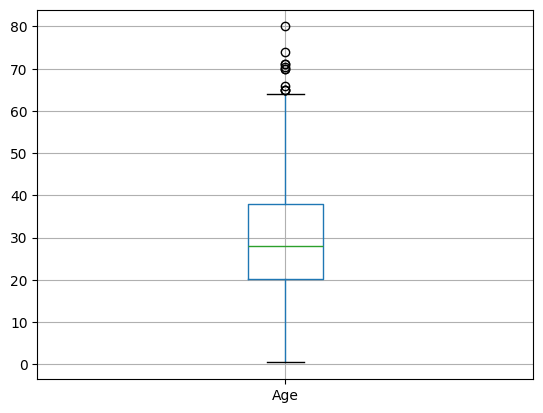

In [ ]:
df.boxplot(column='Age')

4.3 MENGISI NILAI KOSONG PADA KOLOM AGE DENGAN MEDIAN

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


4.4 MENGISI NILAI KOSONG PADA KOLOM EMBARKED DENGAN MODUS

In [ ]:
# replacing the missing value in "Embarked" column with mode value

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3879503549.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


4.5 VERIFIKASI ULANG MISSING VALUE

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
replacements = {
    'Sex':{'male':0,'female':1},
    'Embarked':{'S':0,'C':1,'Q':2}
}

df.replace(replacements, inplace=True)

/tmp/ipython-input-2188194079.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replacements, inplace=True)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


6. SPLIT DATA DAN TRANFORMSAI (SCALING)

SPLIT DATA VARIABEL X DAN Y

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

TRANSFORM DATA

In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

TRAIN-TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

6.2 TRANFORMSDI DATA (SCALING)

6.3 MEMBAGI DATA LATIH DAN UJI

7. MODELLING - MENENTUKAN STRUKTUR INPUT UNTUK NEURAL NETWORK

In [ ]:
X_train.shape

(712, 8)

In [ ]:
X_train.shape[1]

8

8. PEMBUATAN MODEL NERUAL NETWORK (ARSITEKTUR ANN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()

# Hidden layer 1
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

# dropout untuk mengurangi overfitting
model.add(Dropout(0.3))

# Hidden layer 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))


9. KOMPILASI MODEL DAN RINGKASAN ARSITEKTUR (MODEL SUMMARY)

In [ ]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,377 (5.38 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

10. EARLY STOPPING (PENCEGAHAN OVERFITTING SELAMA TRAINING)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

11. TRAINING MODEL NEURAL NETWORK

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4870 - loss: 0.7181 - val_accuracy: 0.6434 - val_loss: 0.6627
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6058 - loss: 0.6875 - val_accuracy: 0.7133 - val_loss: 0.6309
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6564 - loss: 0.6585 - val_accuracy: 0.7343 - val_loss: 0.6041
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7143 - loss: 0.6147 - val_accuracy: 0.7413 - val_loss: 0.5789
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7533 - loss: 0.5909 - val_accuracy: 0.7413 - val_loss: 0.5559
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7104 - loss: 0.5970 - val_accuracy: 0.7413 - val_loss: 0.5305
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7603 - loss: 0.5494 - val_accuracy: 0.7692 - val_loss: 0.5100
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7605 - loss: 0.5525 - val_accuracy: 0.8182 - 

12. EVALUASI MODEL (TESTING DATA)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss      :", loss)
print("Test Accuracy  :", accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8255 - loss: 0.3936 
Test Loss      : 0.40584611892700195
Test Accuracy  : 0.8044692873954773


13. VISUALISASI HASIL PELATIHAN (ACCURACY DAN LOSS)

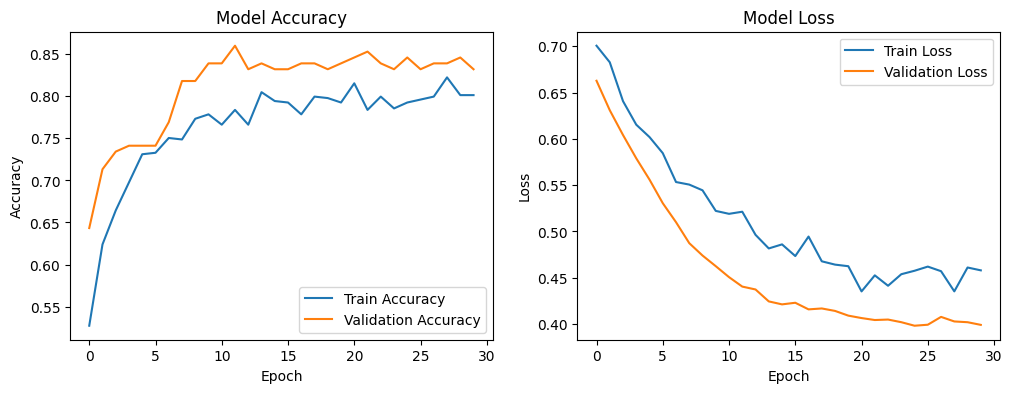

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

KESIMPULAN PRAKTIKUM

1. Model Artificial Neural Network (ANN) berhasil dibangun menggunakan arsitektur berurutan (Sequential Model) dengan dua hidden layer berukuran 32 dan 16 neuron serta fungsi aktivasiReLU, dan satu output layer dengan fungsi aktivasi Sigmoid untuk klasifikasi biner.

2. Model dikompilasi dengan optimizer Adam dan loss function Binary Crossentropy, serta dievaluasi menggunakan akurasi (accuracy) sebagai metrik utama.

3. Untuk mencegah overfitting, digunakan teknik EarlyStopping dengan parameter
monitor='val_loss', patience=5, dan restore_best_weights=True, sehingga proses training berhenti otomatis ketika performa model tidak membaik lagi.

4. Berdasarkan hasil evaluasi:
- Nilai Test Accuracy ≈ 0.80 (80%), menunjukkan model mampu memprediksi status
keselamatan penumpang dengan cukup baik.
- Nilai Test Loss ≈ 0.39, menunjukkan tingkat kesalahan prediksi yang rendah.
- Grafik accuracy dan loss menunjukkan tren stabil tanpa tanda overfitting, dengan validation accuracy mendekati training accuracy.